In [40]:
using GraphViz

using StockFlow
using StockFlow.Syntax

using Catlab
using Catlab.CategoricalAlgebra
using LabelledArrays
using OrdinaryDiffEq
using Plots

using Catlab.Graphics
using Catlab.Programs
using Catlab.WiringDiagrams

In [41]:
display_uwd(ex) = to_graphviz(ex, box_labels=:name, junction_labels=:variable, edge_attrs=Dict(:len=>"1"));

The figure shows the composition is list as follows:

![COVID_full_compose.jpg](figures/COVID_full_compose.jpg)

Math Equations of the composed COVID-19 model:

![math_equation.png](figures/math_equation.png)

# Model A: 
Model A simulates the disease spread through the symptomatic infectious, development. This is an extended model based on SEIR model, where stock IA represent infectives during asymptomatic stage before symptomics occur; stock IYU represents symptomatic infectives with complications; stock IYN represents symptomatic infectives without complications.

![COVID_full_model_A.jpg](figures/COVID_full_model_A.jpg)

In [42]:
seir = @stock_and_flow begin
    
    :stocks
    S
    E
    IA
    IYU
    IYN
    R
    
    :parameters
    β
    rLatent
    rIncubation
    rDevelop
    rRecovery
    rw
    
    :dynamic_variables
    v_NewIncidence₁ = β * NIC
    v_NewIncidence₂ = v_NewIncidence₁ / N # λ
    v_NewIncidence₃ = v_NewIncidence₂ * S


    v_NewInfectious = E * rLatent
    v_BecomingSymptomatic = IA * rIncubation
    v_SymptomicsNotDevelopingComplications = IYU * rDevelop
    v_NewRecovery = IYN * rRecovery
    v_WaningImmunityR = R * rw
    
    :flows
    S => fNewIncidence(v_NewIncidence₃) => E
    E => fNewInfectious(v_NewInfectious) => IA
    IA => fBecomingSymptomatic(v_BecomingSymptomatic) => IYU
    IYU => fSymptomicsNotDevelopingComplications(v_SymptomicsNotDevelopingComplications) => IYN
    IYN => fNewRecovery(v_NewRecovery) => R
    R => fWaningImmunityR(v_WaningImmunityR) => S
    
    
    
    :sums
    N = [S, E, IA, IYU, IYN, R]
    NIC = [IA, IYU, IYN]
    NI = [IA, IYU, IYN]
    
end


S,sname
1,S
2,E
3,IA
4,IYU
5,IYN
6,R
SV,svname
1,N
2,NIC
3,NI


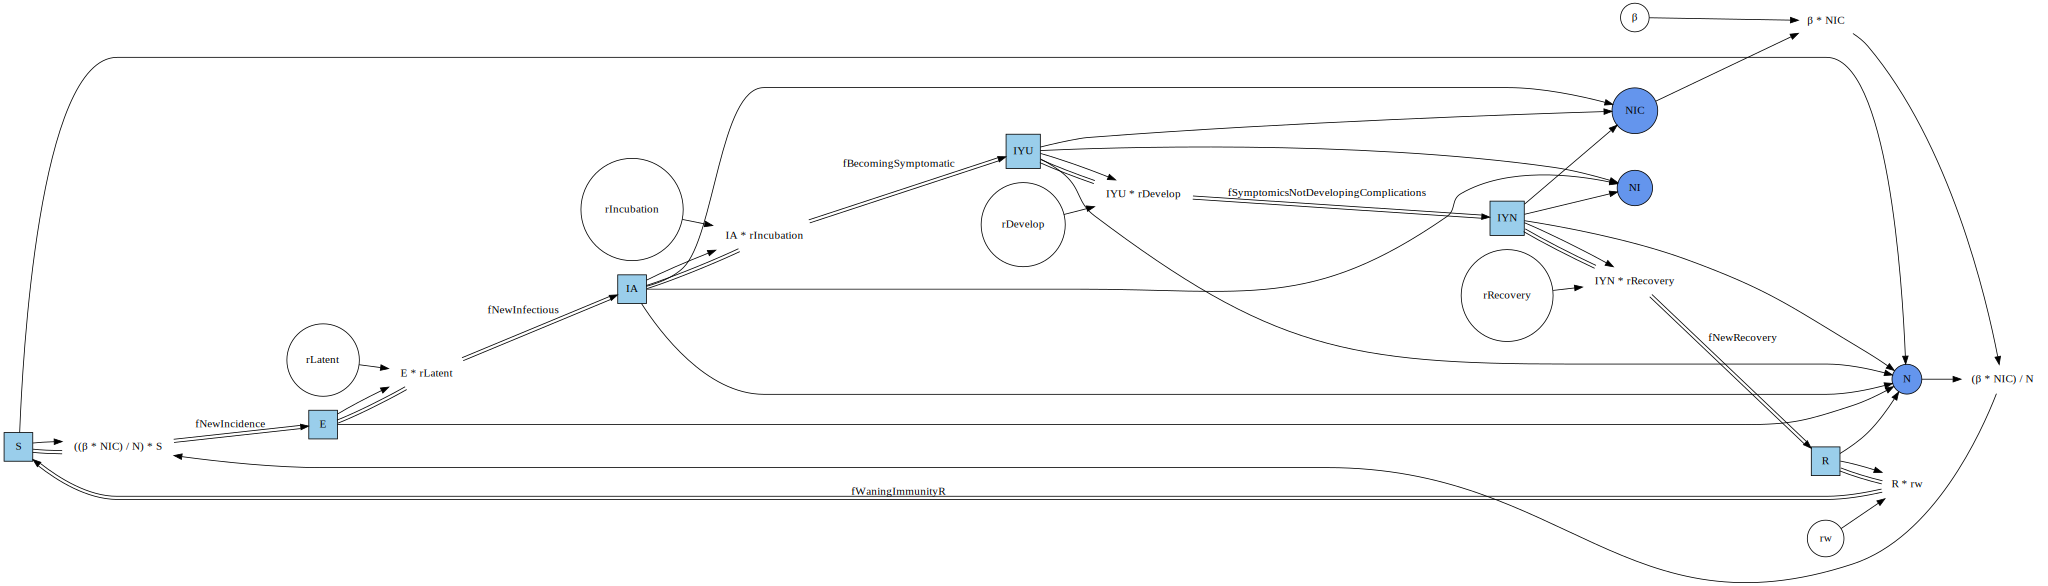

In [43]:
GraphF(seir)

# Model B: 
Model B simulates the vaccination process. The stock “VP” represents individuals who are partially vaccinated, because they have only received the first dose of the vaccine or immunity from vaccination has decrease. In contrast, the stock “VF” represents individuals who are fully vaccinated having received two doses of the vaccine or immunity from vaccination has increase due to boosters. Notably, both partially and fully vaccinated individuals are not fully protected from transmitting the disease. Thus, there are flows from stock “VP” and “VF” to “E” that represents the new infection of vaccinated individuals.

![COVID_full_model_B.jpg](figures/COVID_full_model_B.jpg)

In [44]:
v = @stock_and_flow begin
    :stocks
    S
    E
    VP
    VF
    
    
    :parameters
    rv
    rw
    λ
    eP_complement # 1.0 - eP
    eF_complement # 1.0 - eF


    :dynamic_variables
    v_NewIncidenceVP = VP * eP_complement
    v_NewIncidenceVF = VF * eF_complement

    v_infVP = v_NewIncidenceVP * λ
    v_infVF = v_NewIncidenceVF * λ

    
    :flows
    S => fFirstdoseVaccine(S * rv) => VP
    VP => fWaningImmunityVP(VP * rw) => S
    VP => fSeconddoseVaccine(VP * rv) => VF
    VF => fWaningImmunityVF(VF * rw) => VP
    VP => fNewIncidenceVP(v_infVP) => E
    VF => fNewIncidenceVF(v_infVF) => E

    
    
    :sums
    N = [S, E, VP, VF]
    NIC = []
end

StockAndFlowF {S:4, SV:2, LS:4, F:6, I:6, O:6, V:8, LV:6, LSV:0, P:5, LVV:2, LPV:8, Name:0, Op:0, Position:0}
┌───┬───────┐
│ S │ sname │
├───┼───────┤
│ 1 │     S │
│ 2 │     E │
│ 3 │    VP │
│ 4 │    VF │
└───┴───────┘
┌────┬────────┐
│ SV │ svname │
├────┼────────┤
│  1 │      N │
│  2 │    NIC │
└────┴────────┘
┌────┬─────┬──────┐
│ LS │ lss │ lssv │
├────┼─────┼──────┤
│  1 │   1 │    1 │
│  2 │   2 │    1 │
│  3 │   3 │    1 │
│  4 │   4 │    1 │
└────┴─────┴──────┘
┌───┬────┬────────────────────┐
│ F │ fv │              fname │
├───┼────┼────────────────────┤
│ 1 │  5 │  fFirstdoseVaccine │
│ 2 │  6 │  fWaningImmunityVP │
│ 3 │  7 │ fSeconddoseVaccine │
│ 4 │  8 │  fWaningImmunityVF │
│ 5 │  3 │    fNewIncidenceVP │
│ 6 │  4 │    fNewIncidenceVF │
└───┴────┴────────────────────┘
┌───┬─────┬────┐
│ I │ ifn │ is │
├───┼─────┼────┤
│ 1 │   2 │  1 │
│ 2 │   5 │  2 │
│ 3 │   6 │  2 │
│ 4 │   1 │  3 │
│ 5 │   4 │  3 │
│ 6 │   3 │  4 │
└───┴─────┴────┘
┌───┬─────┬────┐
│ O │ ofn │ os │
├───┼─────┼────┤
│ 1 │   1 │  1 │
│ 2 │   2 │  3 │
│ 3 │   3 │  3 │
│ 4 │   5 │  3 │
│ 5 │   4 │  4 │
│ 6 │   6 │  4 │
└───┴─────┴────┘
┌───┬────────────────────────────┬─────┐
│ V │                      vname │ vop │
├───┼────────────────────────────┼─────┤
│ 1 │           v_NewIncidenceVP │   * │
│ 2 │           v_NewIncidenceVF │   * │
│ 3 │                    v_infVP │   * │
│ 4 │                    v_infVF │   * │
│ 5 │  ##v_fFirstdoseVaccine#365 │   * │
│ 6 │  ##v_fWaningImmunityVP#366 │   * │
│ 7 │ ##v_fSeconddoseVaccine#367 │   * │
│ 8 │  ##v_fWaningImmunityVF#368 │   * │
└───┴────────────────────────────┴─────┘
┌────┬─────┬─────┬─────────────┐
│ LV │ lvs │ lvv │ lvsposition │
├────┼─────┼─────┼─────────────┤
│  1 │   3 │   1 │           1 │
│  2 │   4 │   2 │           1 │
│  3 │   1 │   5 │           1 │
│  4 │   3 │   6 │           1 │
│  5 │   3 │   7 │           1 │
│  6 │   4 │   8 │           1 │
└────┴─────┴─────┴─────────────┘
┌───┬───────────────┐
│ P │         pname │
├───┼───────────────┤
│ 1 │            rv │
│ 2 │            rw │
│ 3 │             λ │
│ 4 │ eP_complement │
│ 5 │ eF_complement │
└───┴───────────────┘
┌─────┬───────┬───────┬───────────────┐
│ LVV │ lvsrc │ lvtgt │ lvsrcposition │
├─────┼───────┼───────┼───────────────┤
│   1 │     1 │     3 │             1 │
│   2 │     2 │     4 │             1 │
└─────┴───────┴───────┴───────────────┘
┌─────┬──────┬──────┬──────────────┐
│ LPV │ lpvp │ lpvv │ lpvpposition │
├─────┼──────┼──────┼──────────────┤
│   1 │    4 │    1 │            2 │
│   2 │    5 │    2 │            2 │
│   3 │    3 │    3 │            2 │
│   4 │    3 │    4 │            2 │
│   5 │    1 │    5 │            2 │
│   6 │    2 │    6 │            2 │
│   7 │    1 │    7 │            2 │
│   8 │    2 │    8 │            2 │
└─────┴──────┴──────┴──────────────┘

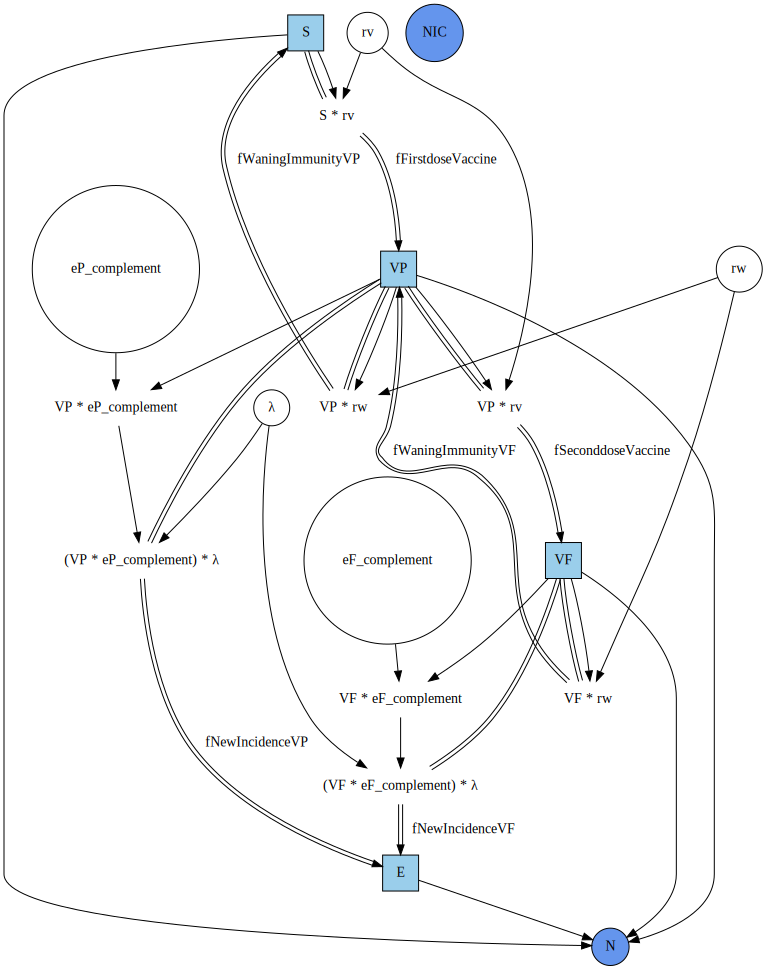

In [45]:
GraphF(v;rd="TB")

# Model C:
Model C simulates a disease developmental process for individuals who are persistently asymptomatic. The stocks “IA2” and "IA3" indicate the infected individuals without any symptoms, and they correspond to similiar stage of "IYU" and "IYN" with symptoms respectively.

![COVID_full_model_C.jpg](figures/COVID_full_model_C.jpg)

In [46]:
ia = @stock_and_flow begin
    :stocks
    IA
    IA2
    IA3
    R
    
    :parameters
    rIncubationIA
    rDevelopIA2
    rRecoveryIA3
    
    :flows
    IA => fDevelopmentOfPersistentAsymptomaticity(IA * rIncubationIA) => IA2
    IA2 => fProgressionIA2_IA3(IA2 * rDevelopIA2) => IA3
    IA3 => fNewrecoveryIA3(IA3 * rRecoveryIA3) => R
    
    :sums
    N = [IA, IA2, IA3, R]
    NIC = [IA, IA2, IA3]
    NI = [IA, IA2, IA3]
end

StockAndFlowF {S:4, SV:3, LS:10, F:3, I:3, O:3, V:3, LV:3, LSV:0, P:3, LVV:0, LPV:3, Name:0, Op:0, Position:0}
┌───┬───────┐
│ S │ sname │
├───┼───────┤
│ 1 │    IA │
│ 2 │   IA2 │
│ 3 │   IA3 │
│ 4 │     R │
└───┴───────┘
┌────┬────────┐
│ SV │ svname │
├────┼────────┤
│  1 │      N │
│  2 │    NIC │
│  3 │     NI │
└────┴────────┘
┌────┬─────┬──────┐
│ LS │ lss │ lssv │
├────┼─────┼──────┤
│  1 │   1 │    1 │
│  2 │   1 │    2 │
│  3 │   1 │    3 │
│  4 │   2 │    1 │
│  5 │   2 │    2 │
│  6 │   2 │    3 │
│  7 │   3 │    1 │
│  8 │   3 │    2 │
│  9 │   3 │    3 │
│ 10 │   4 │    1 │
└────┴─────┴──────┘
┌───┬────┬─────────────────────────────────────────┐
│ F │ fv │                                   fname │
├───┼────┼─────────────────────────────────────────┤
│ 1 │  1 │ fDevelopmentOfPersistentAsymptomaticity │
│ 2 │  2 │                     fProgressionIA2_IA3 │
│ 3 │  3 │                         fNewrecoveryIA3 │
└───┴────┴─────────────────────────────────────────┘
┌───┬─────┬────┐
│ I │ ifn │ is │
├───┼─────┼────┤
│ 1 │   1 │  2 │
│ 2 │   2 │  3 │
│ 3 │   3 │  4 │
└───┴─────┴────┘
┌───┬─────┬────┐
│ O │ ofn │ os │
├───┼─────┼────┤
│ 1 │   1 │  1 │
│ 2 │   2 │  2 │
│ 3 │   3 │  3 │
└───┴─────┴────┘
┌───┬─────────────────────────────────────────────────┬─────┐
│ V │                                           vname │ vop │
├───┼─────────────────────────────────────────────────┼─────┤
│ 1 │ ##v_fDevelopmentOfPersistentAsymptomaticity#369 │   * │
│ 2 │                     ##v_fProgressionIA2_IA3#370 │   * │
│ 3 │                         ##v_fNewrecoveryIA3#371 │   * │
└───┴─────────────────────────────────────────────────┴─────┘
┌────┬─────┬─────┬─────────────┐
│ LV │ lvs │ lvv │ lvsposition │
├────┼─────┼─────┼─────────────┤
│  1 │   1 │   1 │           1 │
│  2 │   2 │   2 │           1 │
│  3 │   3 │   3 │           1 │
└────┴─────┴─────┴─────────────┘
┌───┬───────────────┐
│ P │         pname │
├───┼───────────────┤
│ 1 │ rIncubationIA │
│ 2 │   rDevelopIA2 │
│ 3 │  rRecoveryIA3 │
└───┴───────────────┘
┌─────┬──────┬──────┬──────────────┐
│ LPV │ lpvp │ lpvv │ lpvpposition │
├─────┼──────┼──────┼──────────────┤
│   1 │    1 │    1 │            2 │
│   2 │    2 │    2 │            2 │
│   3 │    3 │    3 │            2 │
└─────┴──────┴──────┴──────────────┘

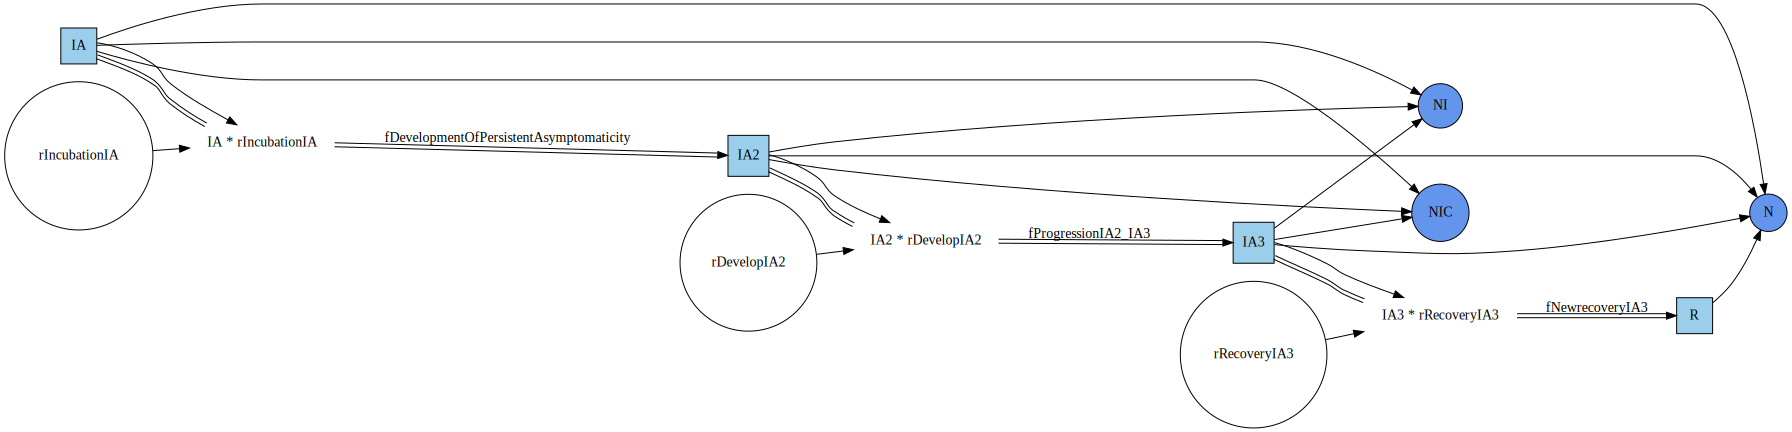

In [47]:
GraphF(ia)

# Model D:
Model D simulates the hospitalization process due to COVID-19, where the stocks labelled “HICU” and “HNICU” represent the populations of hospitalized ICU patients and hospitalized non-ICU patients. And the stock "D" represents the hospitalized deaths due to COVID-19 infected patients.

![COVID_full_model_D.jpg](figures/COVID_full_model_D.jpg)

In [48]:
h = @stock_and_flow begin
    :stocks
     IYU
     HICU
     HNICU
     R
     D
     
     :parameters
     rAdmICU
     rAdmNICU
     rOutICU
     rrH
     rDeathICU
     rDeathNICU
     
     :dynamic_variables
     v_HICUAdmission = IYU * rAdmICU
     v_HNICUAdmission = IYU * rAdmNICU
     v_OutICU = HICU * rOutICU
     v_RecoveryH = HNICU * rrH
     v_NewDeathsHICU = HICU * rDeathICU
     v_NewDeathsHNICU = HNICU * rDeathNICU
     
     :flows
     IYU => f_HICUAdmission(v_HICUAdmission) => HICU
     IYU => f_HNICUAdmission(v_HNICUAdmission) => HNICU
     HICU => f_OutICU(v_OutICU) => HNICU
     HNICU => f_RecoveryH(v_RecoveryH) => R
     HICU => f_NewDeathsHICU(v_NewDeathsHICU) => D
     HNICU => f_NewDeathsHNICU(v_NewDeathsHNICU) => D
     
     :sums
     N = [IYU, HICU, HNICU, R]
     NIC = [IYU]
     NI = [IYU, HICU, HNICU]
     
     
 end

StockAndFlowF {S:5, SV:3, LS:8, F:6, I:6, O:6, V:6, LV:6, LSV:0, P:6, LVV:0, LPV:6, Name:0, Op:0, Position:0}
┌───┬───────┐
│ S │ sname │
├───┼───────┤
│ 1 │   IYU │
│ 2 │  HICU │
│ 3 │ HNICU │
│ 4 │     R │
│ 5 │     D │
└───┴───────┘
┌────┬────────┐
│ SV │ svname │
├────┼────────┤
│  1 │      N │
│  2 │    NIC │
│  3 │     NI │
└────┴────────┘
┌────┬─────┬──────┐
│ LS │ lss │ lssv │
├────┼─────┼──────┤
│  1 │   1 │    1 │
│  2 │   1 │    2 │
│  3 │   1 │    3 │
│  4 │   2 │    1 │
│  5 │   2 │    3 │
│  6 │   3 │    1 │
│  7 │   3 │    3 │
│  8 │   4 │    1 │
└────┴─────┴──────┘
┌───┬────┬──────────────────┐
│ F │ fv │            fname │
├───┼────┼──────────────────┤
│ 1 │  1 │  f_HICUAdmission │
│ 2 │  2 │ f_HNICUAdmission │
│ 3 │  3 │         f_OutICU │
│ 4 │  4 │      f_RecoveryH │
│ 5 │  5 │  f_NewDeathsHICU │
│ 6 │  6 │ f_NewDeathsHNICU │
└───┴────┴──────────────────┘
┌───┬─────┬────┐
│ I │ ifn │ is │
├───┼─────┼────┤
│ 1 │   1 │  2 │
│ 2 │   2 │  3 │
│ 3 │   3 │  3 │
│ 4 │   4 │  4 │
│ 5 │   5 │  5 │
│ 6 │   6 │  5 │
└───┴─────┴────┘
┌───┬─────┬────┐
│ O │ ofn │ os │
├───┼─────┼────┤
│ 1 │   1 │  1 │
│ 2 │   2 │  1 │
│ 3 │   3 │  2 │
│ 4 │   5 │  2 │
│ 5 │   4 │  3 │
│ 6 │   6 │  3 │
└───┴─────┴────┘
┌───┬──────────────────┬─────┐
│ V │            vname │ vop │
├───┼──────────────────┼─────┤
│ 1 │  v_HICUAdmission │   * │
│ 2 │ v_HNICUAdmission │   * │
│ 3 │         v_OutICU │   * │
│ 4 │      v_RecoveryH │   * │
│ 5 │  v_NewDeathsHICU │   * │
│ 6 │ v_NewDeathsHNICU │   * │
└───┴──────────────────┴─────┘
┌────┬─────┬─────┬─────────────┐
│ LV │ lvs │ lvv │ lvsposition │
├────┼─────┼─────┼─────────────┤
│  1 │   1 │   1 │           1 │
│  2 │   1 │   2 │           1 │
│  3 │   2 │   3 │           1 │
│  4 │   3 │   4 │           1 │
│  5 │   2 │   5 │           1 │
│  6 │   3 │   6 │           1 │
└────┴─────┴─────┴─────────────┘
┌───┬────────────┐
│ P │      pname │
├───┼────────────┤
│ 1 │    rAdmICU │
│ 2 │   rAdmNICU │
│ 3 │    rOutICU │
│ 4 │        rrH │
│ 5 │  rDeathICU │
│ 6 │ rDeathNICU │
└───┴────────────┘
┌─────┬──────┬──────┬──────────────┐
│ LPV │ lpvp │ lpvv │ lpvpposition │
├─────┼──────┼──────┼──────────────┤
│   1 │    1 │    1 │            2 │
│   2 │    2 │    2 │            2 │
│   3 │    3 │    3 │            2 │
│   4 │    4 │    4 │            2 │
│   5 │    5 │    5 │            2 │
│   6 │    6 │    6 │            2 │
└─────┴──────┴──────┴──────────────┘

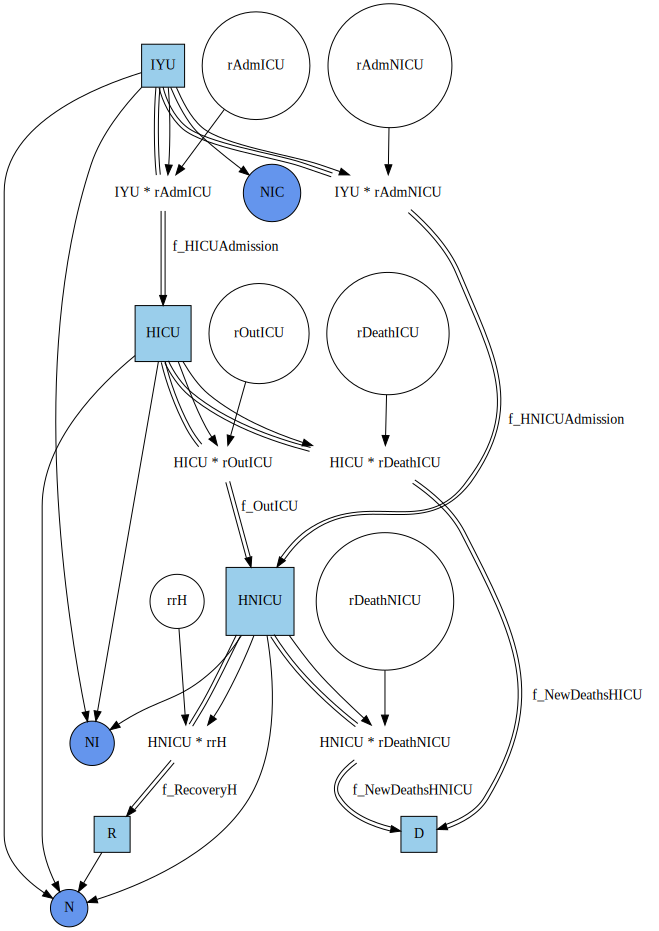

In [49]:
GraphF(h;rd="TB")

## Defines the sub-components plans to be composed

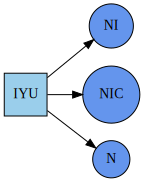

In [50]:
footIYUN=foot(:IYU, (:NI,:NIC,:N), (:IYU=>:NI, :IYU=>:NIC, :IYU=>:N))
GraphF(footIYUN;schema="C0")

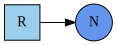

In [51]:
footRN=foot(:R, :N, :R=>:N)
GraphF(footRN;schema="C0")


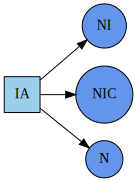

In [52]:
footIAN=foot(:IA, (:NI,:NIC,:N), (:IA=>:NI, :IA=>:NIC, :IA=>:N))
GraphF(footIAN;schema="C0")

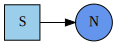

In [53]:
footSN=foot(:S, :N, :S=>:N)
GraphF(footSN;schema="C0")

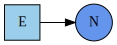

In [54]:
footEN=foot(:E, :N, :E=>:N)
GraphF(footEN;schema="C0")

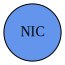

In [55]:
footNIC=foot((),:NIC,())
GraphF(footNIC;schema="C0")

## Defines the UWD of composition

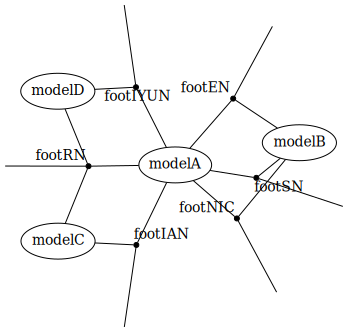

In [56]:
covid = @relation (footSN, footEN, footIAN, footIYUN, footRN, footNIC) begin
    modelA(footSN, footEN, footIAN, footIYUN, footRN, footNIC)
    modelB(footSN, footEN, footNIC)
    modelC(footIAN, footRN)
    modelD(footIYUN, footRN)
end;
display_uwd(covid)

## Composition

In [57]:
open_modelA=Open(seir, footSN, footEN, footIAN, footIYUN, footRN, footNIC)
open_modelB=Open(v,footSN,footEN, footNIC)
open_modelC=Open(ia,footIAN,footRN)
open_modelD=Open(h,footIYUN,footRN)
# Compose those three models according the UWD-algebra
openCOVID19 = oapply(covid, [open_modelA, open_modelB, open_modelC, open_modelD])
# composed model
COVID19=apex(openCOVID19)

S,sname
1,S
2,E
3,IA
4,IYU
5,IYN
6,R
7,VP
8,VF
9,IA2
10,IA3


Composed model:
![COVID_composed.jpg](figures/COVID_composed.jpg)

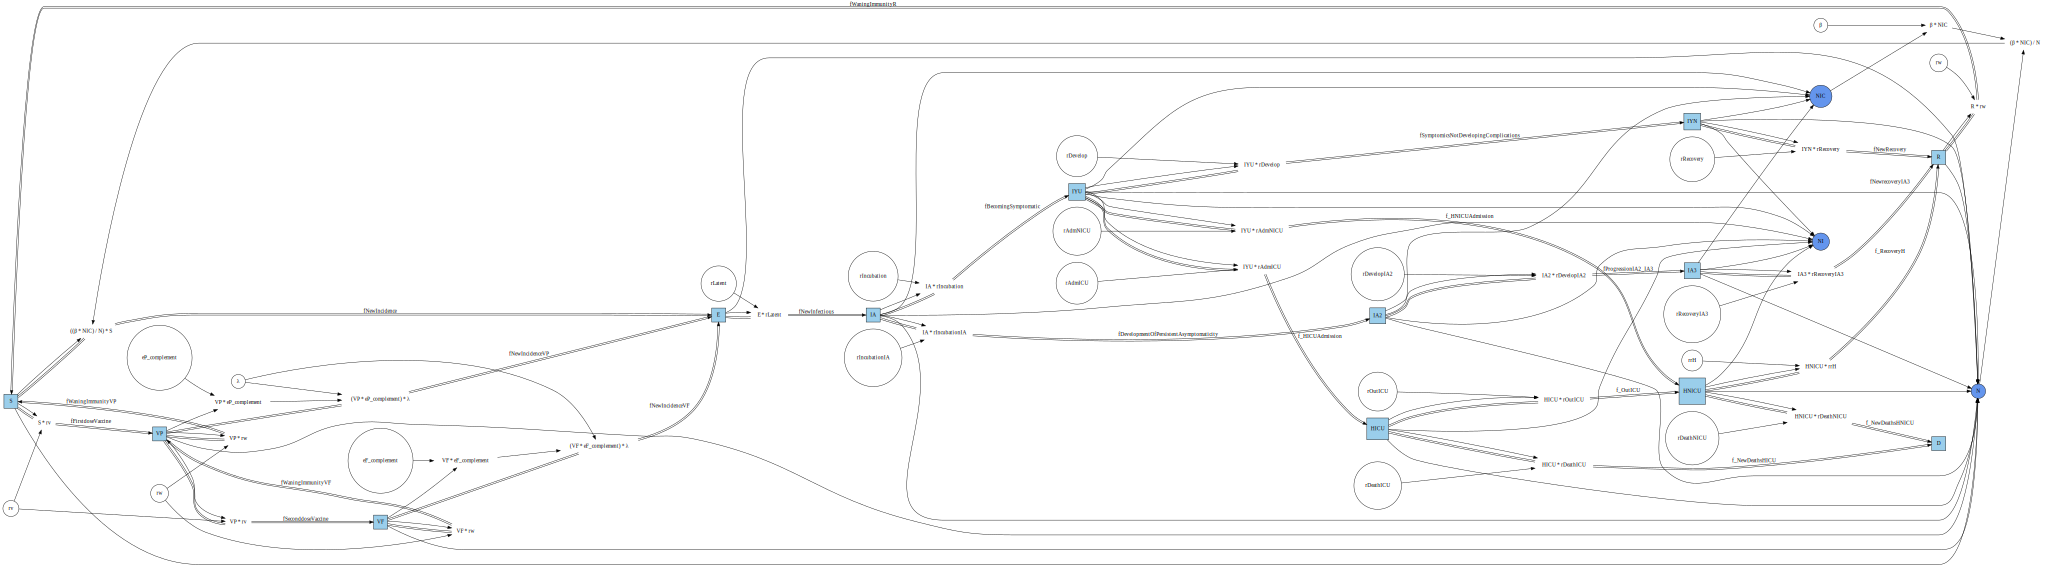

In [58]:
GraphF(COVID19)

## Graph Rewriting

In [59]:
L = @stock_and_flow begin
    :stocks
    VP
    VF
    E

    :parameters
    eP_complement
    eF_complement
    λ
    β


    :flows
    VP => fNewIncidenceVP(v_infVP) => E
    VF => fNewIncidenceVF(v_infVF) => E

    :dynamic_variables
    v_NewIncidence₁ = β * NIC
    v_NewIncidence₂ = v_NewIncidence₁ / N # λ

    v_NewIncidenceVP = VP * eP_complement
    v_NewIncidenceVF = VF * eF_complement

    v_infVP = v_NewIncidenceVP * λ
    v_infVF = v_NewIncidenceVF * λ
    

    :sums
    N = [VP, VF, E]
    NIC = []
end;

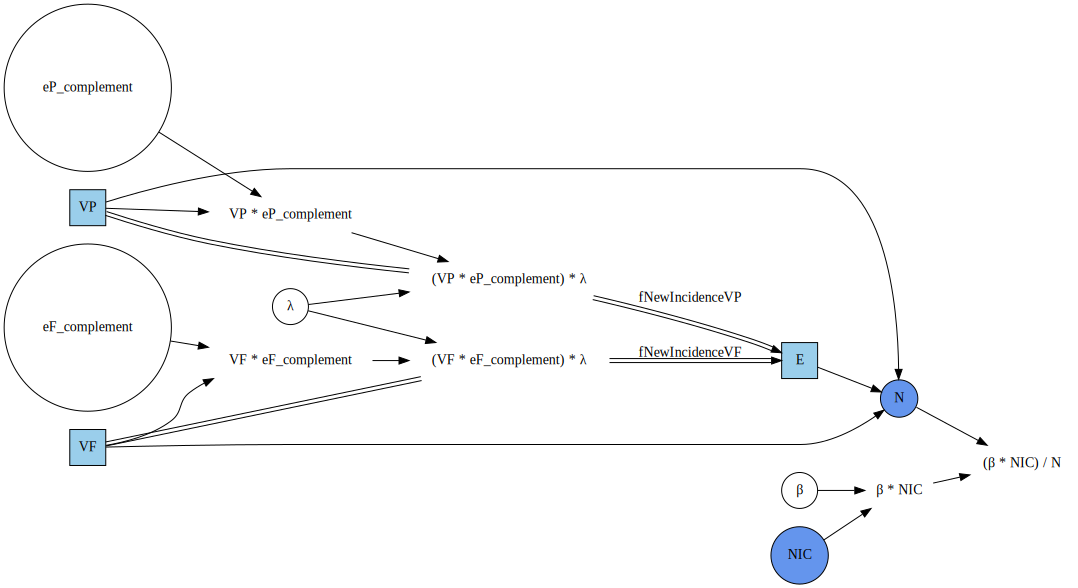

In [60]:
GraphF(L)

In [61]:
I = @stock_and_flow begin
    :stocks
    VP
    VF
    E

    :parameters
    eP_complement
    eF_complement
    β

    :flows
    VP => fNewIncidenceVP(v_infVP) => E
    VF => fNewIncidenceVF(v_infVF) => E

    :dynamic_variables
    v_NewIncidence₁ = β * NIC
    v_NewIncidence₂ = v_NewIncidence₁ / N # λ
    v_NewIncidenceVP = VP * eP_complement
    v_NewIncidenceVF = VF * eF_complement


    v_infVP = *(v_NewIncidenceVP)
    v_infVF = *(v_NewIncidenceVF)

    :sums
    N = [VP, VF, E]
    NIC = []
end;

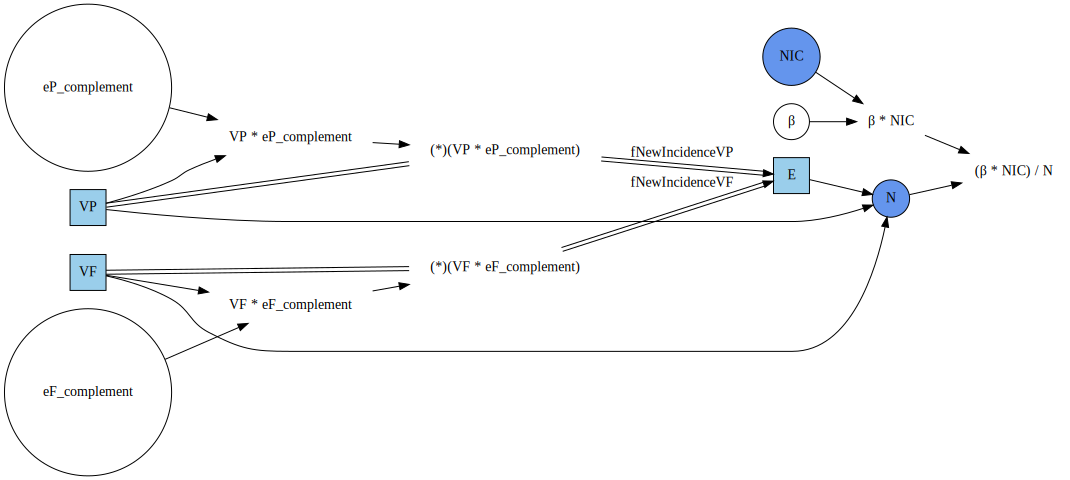

In [62]:
GraphF(I)

In [63]:
R = @stock_and_flow begin
    :stocks
    VP
    VF
    E

    :parameters
    eP_complement
    eF_complement
    β

    :flows
    VP => fNewIncidenceVP(v_infVP) => E
    VF => fNewIncidenceVF(v_infVF) => E

    :dynamic_variables
    v_NewIncidence₁ = β * NIC
    v_NewIncidence₂ = v_NewIncidence₁ / N # λ

    v_NewIncidenceVP = VP * eP_complement
    v_NewIncidenceVF = VF * eF_complement


    v_infVP = v_NewIncidenceVP * v_NewIncidence₂
    v_infVF = v_NewIncidenceVF * v_NewIncidence₂


    :sums
    N = [VP, VF, E]
    NIC = []
end;

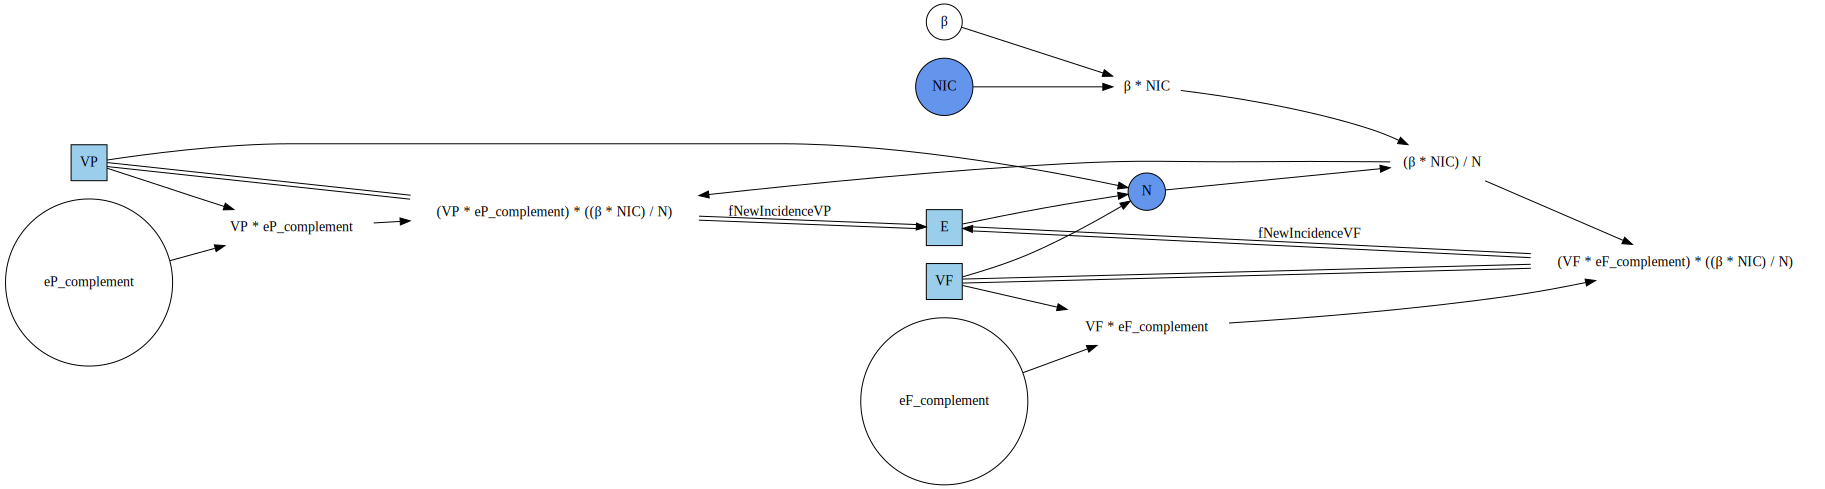

In [64]:
GraphF(R)

In [65]:
using AlgebraicRewriting
using AlgebraicRewriting: rewrite
const hom = Catlab.CategoricalAlgebra.homomorphism

rule = Rule(hom(I,L), hom(I,R))

Rule{:DPO}(ACSetTransformation((S = FinFunction([1, 2, 3], 3, 3), SV = FinFunction([1, 2], 2, 2), LS = FinFunction([1, 2, 3], 3, 3), F = FinFunction([1, 2], 2, 2), I = FinFunction([1, 2], 2, 2), O = FinFunction([1, 2], 2, 2), V = FinFunction([1, 2, 3, 4, 5, 6], 6, 6), LV = FinFunction([1, 2], 2, 2), LSV = FinFunction([1, 2], 2, 2), P = FinFunction([1, 2, 4], 3, 4), LVV = FinFunction([1, 2, 3], 3, 3), LPV = FinFunction([1, 2, 3], 3, 5), Name = VarFunction{Symbol}(FinDomFunction(Union{AttrVar, Symbol}[], FinSet(0), TypeSet(Union{AttrVar, Symbol})), FinSet(0)), Op = VarFunction{Symbol}(FinDomFunction(Union{AttrVar, Symbol}[], FinSet(0), TypeSet(Union{AttrVar, Symbol})), FinSet(0)), Position = VarFunction{Int8}(FinDomFunction(Union{AttrVar, Int8}[], FinSet(0), TypeSet(Union{AttrVar, Int8})), FinSet(0))), StockAndFlowF {S:3, SV:2, LS:3, F:2, I:2, O:2, V:6, LV:2, LSV:2, P:3, LVV:3, LPV:3, Name:0, Op:0, Position:0}, StockAndFlowF {S:3, SV:2, LS:3, F:2, I:2, O:2, V:6, LV:2, LSV:2, P:4, LVV:3, 

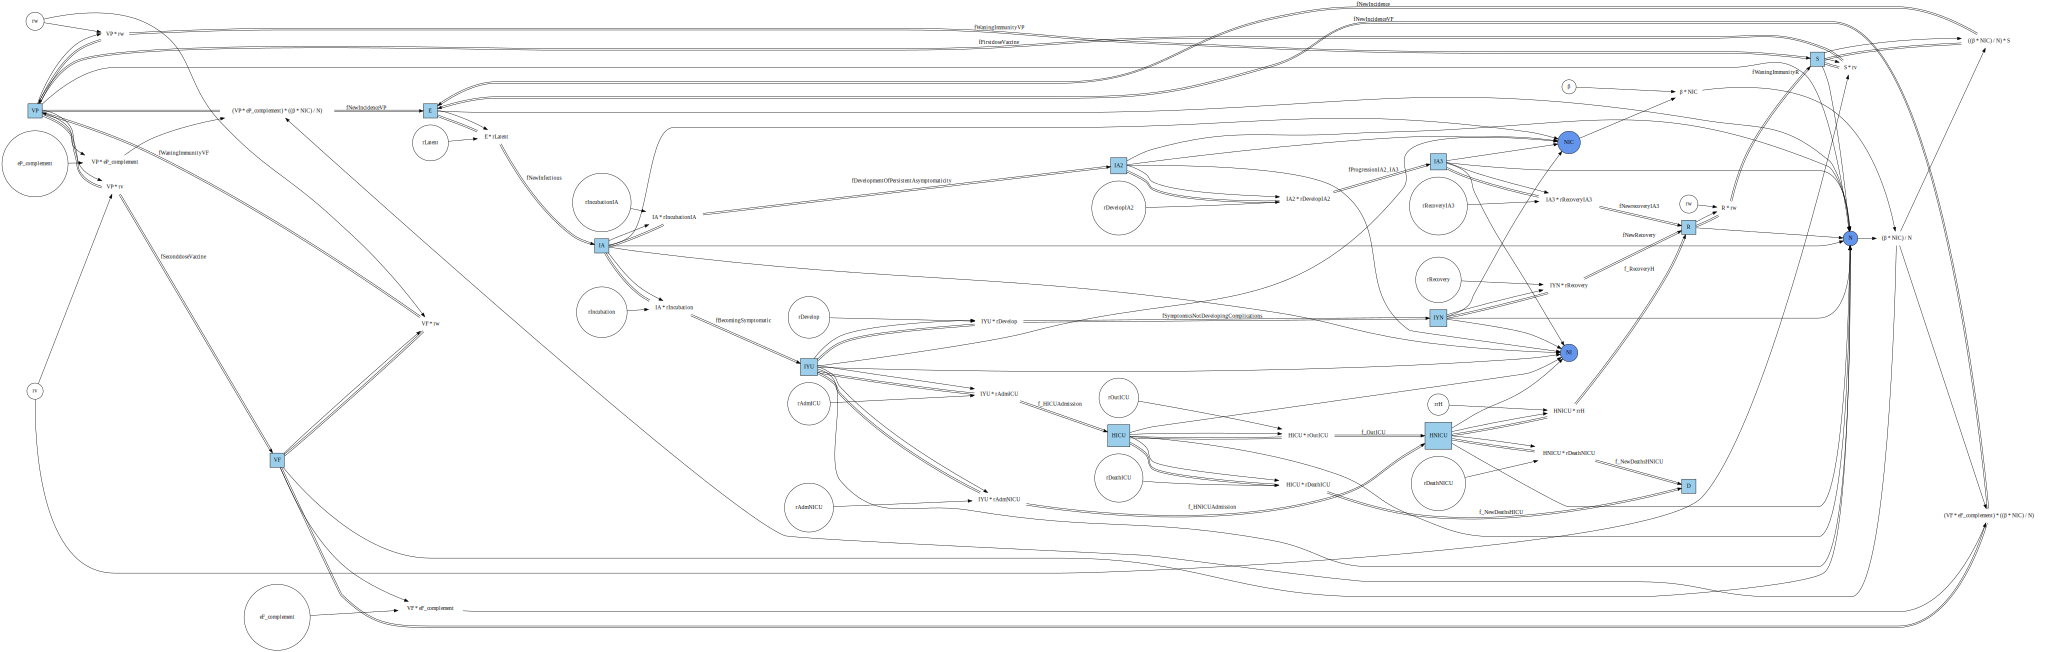

In [66]:
Covid19_rewritten = rewrite(rule, COVID19)
GraphF(Covid19_rewritten)

In [67]:
Covid19_rewritten

S,sname
1,VP
2,VF
3,E
4,S
5,IA
6,IYU
7,IYN
8,R
9,IA2
10,IA3


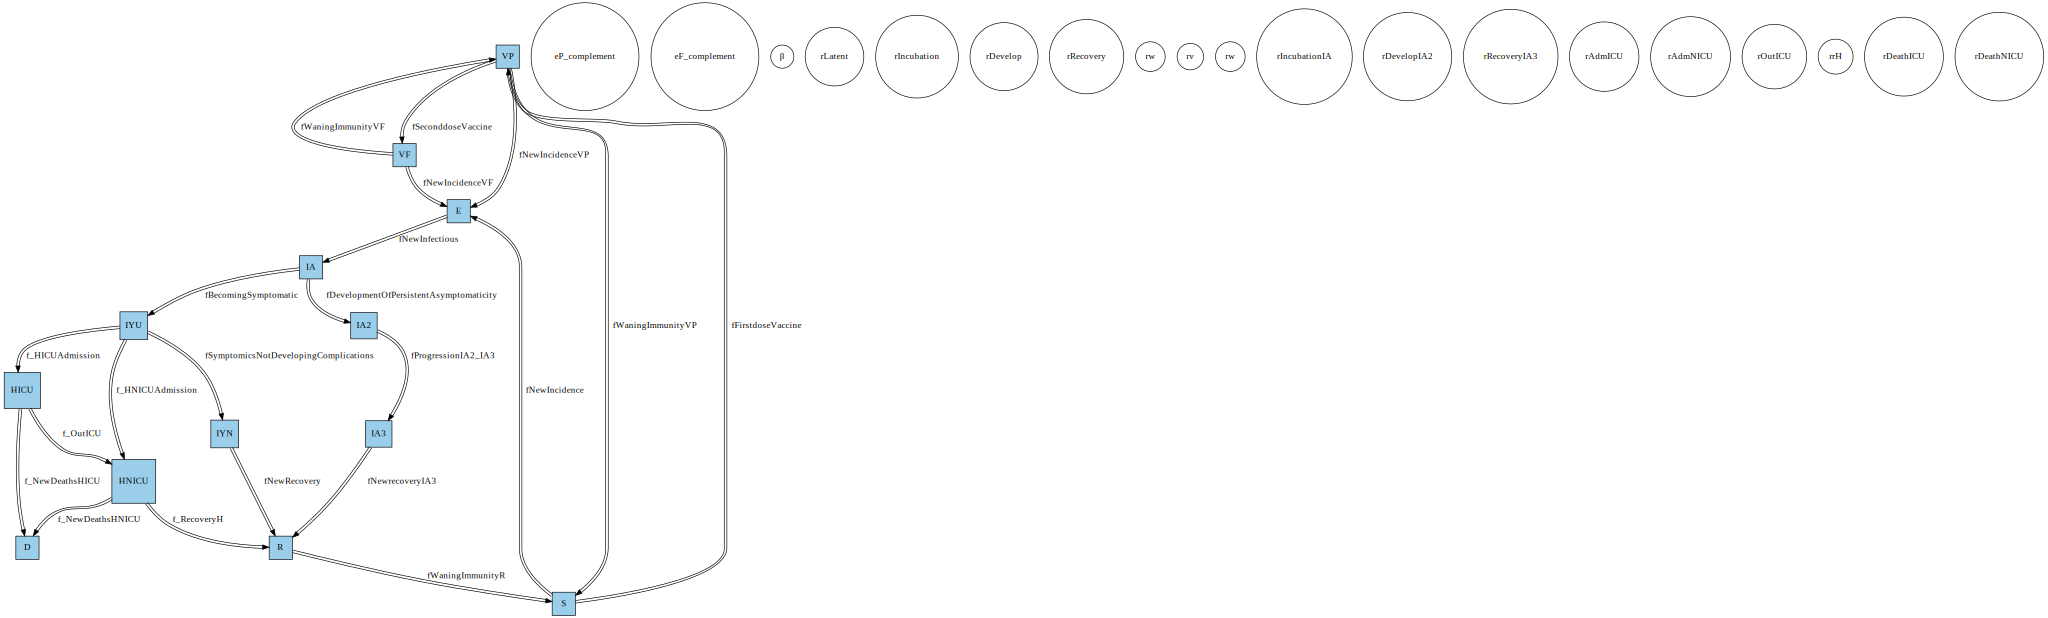

In [68]:
GraphF(Covid19_rewritten; type="SF", rd="TB")

# Define parameters and initial values

In [69]:
# define constant parameters
p_COVID19_raw = LVector(
    β=0.8, tLatent=2.9, tIncubation=2.72, tDevelop=6.0, tRecovery=3.5,tw=2*365.0,
    fH=0.002, fICU=0.23, tICU=6.0, tH = 12.0, tOutICU=6.0, fractionIA=0.4
)


p_COVID19 = LVector(
    β=p_COVID19_raw.β, rLatent=1.0/p_COVID19_raw.tLatent, rIncubation=(1.0-p_COVID19_raw.fractionIA)/p_COVID19_raw.tIncubation,
    rDevelop=(1.0-p_COVID19_raw.fH)/p_COVID19_raw.tDevelop, rRecovery=1.0/p_COVID19_raw.tRecovery, rw=1.0/p_COVID19_raw.tw,
    rv=0.01, eP=0.6, eF=0.85, rIncubationIA=p_COVID19_raw.fractionIA/p_COVID19_raw.tIncubation, 
    rDevelopIA2=1.0/p_COVID19_raw.tDevelop, rRecoveryIA3=1.0/p_COVID19_raw.tRecovery,
    rAdmICU=p_COVID19_raw.fH*p_COVID19_raw.fICU/p_COVID19_raw.tDevelop,
    rAdmNICU=p_COVID19_raw.fH*(1.0-p_COVID19_raw.fICU)/p_COVID19_raw.tDevelop,
    rrH=1.0/p_COVID19_raw.tH, rOutICU=1.0/p_COVID19_raw.tOutICU,rDeathICU=0.085, rDeathNICU=0.018,
    eP_complement = 0.4, eF_complement = 0.15
)
# define initial values for stocks
u0_COVID19 = LVector(
    S=38010000.0, E=0.0, IYU=10.0, IA=0.0, R=0.0, HICU=0.0, HNICU=0.0, VP=0.0, VF=0.0,
    D=0.0, IA2=0.0, IA3=0.0, IYN=0.0
)

13-element LArray{Float64, 1, Vector{Float64}, (:S, :E, :IYU, :IA, :R, :HICU, :HNICU, :VP, :VF, :D, :IA2, :IA3, :IYN)}:
     :S => 3.801e7
     :E => 0.0
   :IYU => 10.0
    :IA => 0.0
     :R => 0.0
  :HICU => 0.0
 :HNICU => 0.0
    :VP => 0.0
    :VF => 0.0
     :D => 0.0
   :IA2 => 0.0
   :IA3 => 0.0
   :IYN => 0.0

# Solve the ODEs

In [ ]:
# results are tested the same as the Anylogic model
prob_COVID19 = ODEProblem(vectorfield(Covid19_rewritten),u0_COVID19,(0.0,100.0),p_COVID19);
sol_COVID19 = solve(prob_COVID19,Tsit5(),abstol=1e-8);
plot(sol_COVID19)

In [ ]:
# to have the figures plotted fix to the wider of the cells
HTML("""
<style>
.output_svg div{
  width: 100% !important;
  height: 100% !important;
}
</style>
""")
